In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn import metrics

sys.path.insert(0, "/opt/vssexclude/personal/kaggle/k_tab_aug")

In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [3]:
import src.config.constants as constants
import src.munging as process_data
import src.common as common

In [4]:
logger = common.get_logger("blending")

train_df, _, _ = process_data.read_processed_data(logger, data_dir=constants.PROCESSED_DATA_DIR)

[INFO]2021-08-31 18:44:41,926:blending:Reading Data from /opt/vssexclude/personal/kaggle/k_tab_aug/data/processed...
[INFO]2021-08-31 18:44:42,077:blending:Shape of train_df : (250000, 101)
[INFO]2021-08-31 18:44:42,140:blending:Shape of test_df : (150000, 100)
[INFO]2021-08-31 18:44:42,145:blending:Shape of sample_submission_df : (150000, 1)


In [5]:
y_true = train_df.loss.values

In [9]:
df_sub_1 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_lgb_ts_f1_weighted_SK_10_tsfresh_top_2_greedy_selection_optuna_param_last_run_0831_1740_0.09326.csv")
df_sub_2 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_lgb_ts_f1_weighted_SK_10_tsfresh_top_2_greedy_selection_set_2_0831_1804_0.09330.csv")

df_oof_1 = pd.read_csv(f"{constants.OOF_DIR}/oof_lgb_ts_f1_weighted_SK_10_tsfresh_top_2_greedy_selection_optuna_param_last_run_0831_1740_0.09326.csv")
df_oof_2 = pd.read_csv(f"{constants.OOF_DIR}/oof_lgb_ts_f1_weighted_SK_10_tsfresh_top_2_greedy_selection_set_2_0831_1804_0.09330.csv")


In [8]:

df_oof_1 = df_oof_1.drop(["Unnamed: 0"], axis=1)
df_oof_2 = df_oof_2.drop(["Unnamed: 0"], axis=1)

In [11]:
df_sub_2.loss.value_counts()

0    150000
Name: loss, dtype: int64

In [9]:
def best_blend(df_oof_1, df_oof_2, y_true, coeff):    
    oof_pred = (df_oof_1 * coeff) + (df_oof_2 * (1.0 - coeff)) 
    rmse = np.sqrt(metrics.mean_squared_error(y_true, oof_pred))
    f1_weighted = metrics.f1_score(y_true, round(oof_pred), average="weighted")
    return rmse, f1_weighted

results_rmse = {}
results_f1 = {}
for i in range(0, 21):
    coeff = i * 0.05
    results_rmse[coeff], results_f1[coeff] = best_blend(df_oof_1[0: 250000], df_oof_2[0: 250000], y_true, coeff)  

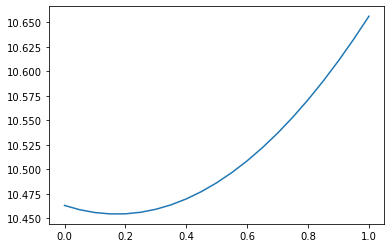

In [10]:
plt.plot(list(results_rmse.keys()), list(results_rmse.values()))
plt.show()

In [13]:
results_rmse

{0.0: 10.46306341374265,
 0.05: 10.458699997609646,
 0.1: 10.45582119969541,
 0.15000000000000002: 10.454428246441793,
 0.2: 10.454521731767553,
 0.25: 10.45610161580309,
 0.30000000000000004: 10.459167224975419,
 0.35000000000000003: 10.463717253442965,
 0.4: 10.469749765873107,
 0.45: 10.477262201548648,
 0.5: 10.486251379782958,
 0.55: 10.496713506617203,
 0.6000000000000001: 10.508644182766872,
 0.65: 10.52203841277915,
 0.7000000000000001: 10.536890615357075,
 0.75: 10.55319463480135,
 0.8: 10.57094375351605,
 0.8500000000000001: 10.590130705520117,
 0.9: 10.61074769090284,
 0.9500000000000001: 10.632786391158247,
 1.0: 10.65623798533047}

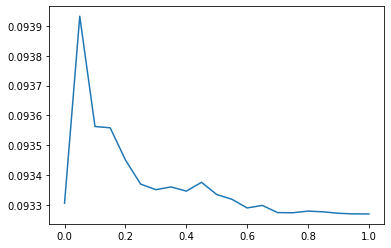

In [11]:
plt.plot(list(results_f1.keys()), list(results_f1.values()))
plt.show()

In [12]:
results_f1

{0.0: 0.09330635410647958,
 0.05: 0.09393209858370791,
 0.1: 0.09356304452115968,
 0.15000000000000002: 0.09355859018954164,
 0.2: 0.09345106371821979,
 0.25: 0.09337018384118971,
 0.30000000000000004: 0.09335151657401682,
 0.35000000000000003: 0.09336065445177343,
 0.4: 0.09334666681330785,
 0.45: 0.0933760745117759,
 0.5: 0.09333525039865903,
 0.55: 0.09331931511226557,
 0.6000000000000001: 0.09329027290805694,
 0.65: 0.09329879851392209,
 0.7000000000000001: 0.09327476607996157,
 0.75: 0.09327426414148327,
 0.8: 0.09327975905813544,
 0.8500000000000001: 0.09327730692284311,
 0.9: 0.09327245706168444,
 0.9500000000000001: 0.09327033107743248,
 1.0: 0.09327033107743248}

In [55]:
results

{0.0: 10.46306341374265,
 0.1: 10.079081601019015,
 0.2: 9.773160782469507,
 0.30000000000000004: 9.552803425173158,
 0.4: 9.42401351442155,
 0.5: 9.390559301766855,
 0.6000000000000001: 9.45345297338491,
 0.7000000000000001: 9.610803196403515,
 0.8: 9.858087993115095,
 0.9: 10.188761235793093,
 1.0: 10.595018074548056}